# Miniprojekt Data Visualization - Titanic

## Überblick

Diese Projekt zieht darauf ab, Daten zu visualisieren, um herauszufinden, welche Faktoren das Überleben oder nicht-Überleben der Passagiere
der Titanik, beeinflusst haben.  

Wir nutzen dafür folgendes Datenset: https://www.kaggle.com/datasemts/yasserh/titanic-dataset  
Weiters werden wir die Spalten PassengerID, Name, Ticket und Fare außen vor lassen, da sie nicht für unsere Analyse relevant sind.  

## Forschungsfragen

1. Wie beeinflussten Geschlecht, Alter und Klasse das Überleben
2. Hatten Familien eine höhere Chance zu überleben - bzw. was war die "perfekte" Familiengröße
3. Wie waren die Preise über die Personen (Alter, Geschlecht, Klasse) aufgeteilt.




In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
titanic_data = sns.load_dataset('titanic')
titanic_data.dropna(axis=0, inplace=True)
titanic_data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 1 to 889
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     182 non-null    int64   
 1   pclass       182 non-null    int64   
 2   sex          182 non-null    object  
 3   age          182 non-null    float64 
 4   sibsp        182 non-null    int64   
 5   parch        182 non-null    int64   
 6   fare         182 non-null    float64 
 7   embarked     182 non-null    object  
 8   class        182 non-null    category
 9   who          182 non-null    object  
 10  adult_male   182 non-null    bool    
 11  deck         182 non-null    category
 12  embark_town  182 non-null    object  
 13  alive        182 non-null    object  
 14  alone        182 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 18.2+ KB


In [4]:
titanic_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


<Axes: >

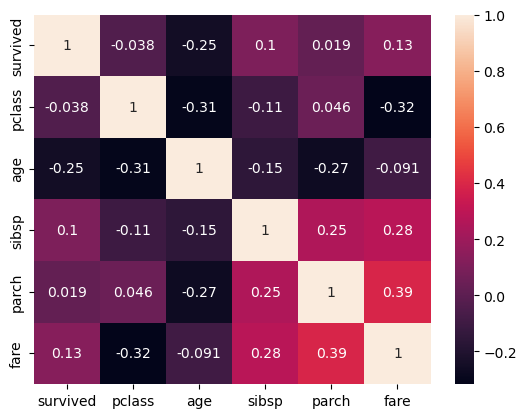

In [5]:
haxi = titanic_data.select_dtypes(include=['number']).corr()
sns.heatmap(haxi, annot=True)

<Axes: >

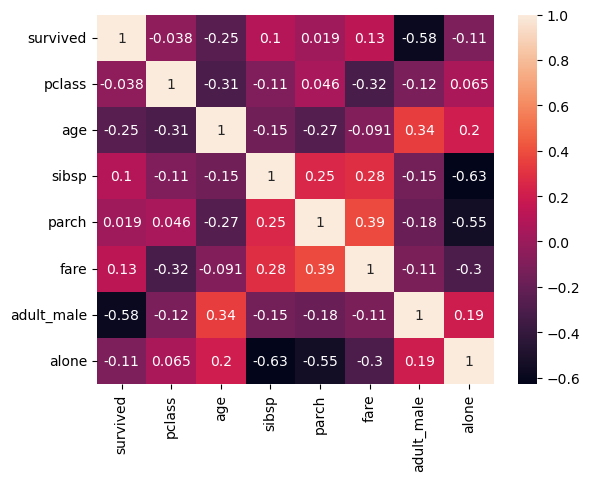

In [6]:
corr = titanic_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

In [9]:
# Grundlegende Statistiken
total_passengers = len(titanic_data)
total_survived = titanic_data['survived'].sum()
survival_rate = titanic_data['survived'].mean() * 100

print(f"Gesamtanzahl der Passagiere: {total_passengers}")
print(f"Anzahl der Überlebenden: {total_survived}")
print(f"Allgemeine Überlebensrate: {survival_rate:.2f}%")

Gesamtanzahl der Passagiere: 182
Anzahl der Überlebenden: 123
Allgemeine Überlebensrate: 67.58%


## Frage 1 
Wie beeinflussten Geschlecht, Alter und Klasse das Überleben

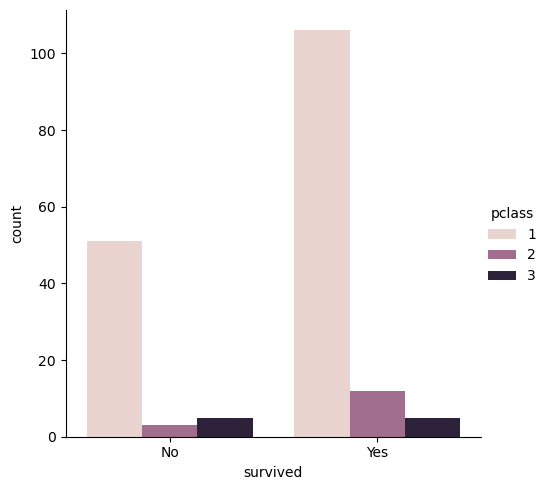

In [13]:
classFilter = sns.catplot(data=titanic_data, kind='count', x='survived', hue='pclass')
classFilter.set_xticklabels(['No', 'Yes'])

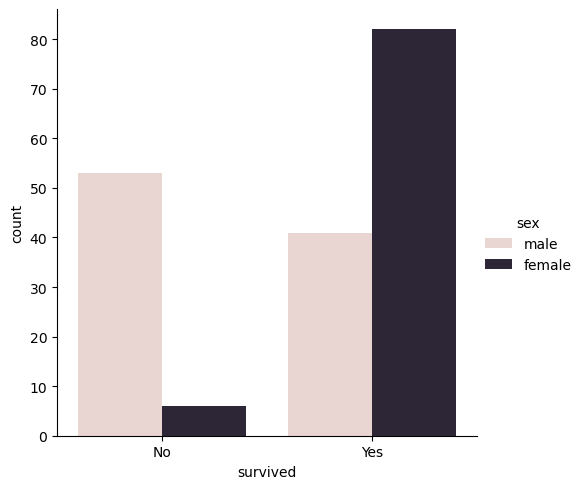

In [60]:
genderFilter = sns.catplot(data=titanic_data, kind='count', x='survived', hue='sex',  palette=["#ECD3D0", "#2D2339"])
genderFilter.set_xticklabels(['No', 'Yes'])

In [52]:
# Überlebensrate nach Geschlecht
gender_survival = titanic_data.groupby('sex')['survived'].mean() * 100
print(f"Überlebensrate Frauen: {gender_survival['female']:.2f}%")
print(f"Überlebensrate Männer: {gender_survival['male']:.2f}%")

Überlebensrate Frauen: 93.18%
Überlebensrate Männer: 43.62%


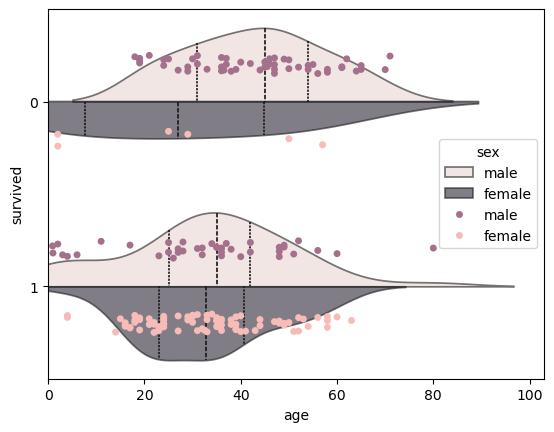

In [76]:
violin_palette = {
    "male": "#ECD3D0",    # very light pink
    "female": "#2D2339"  # deep charcoal purple
}

strip_palette = {
    "male": "#A5708C",   # dusky purple
    "female": "#F7BBB8" # pale rose
}

sns.violinplot(
    data=titanic_data, 
    x='age', 
    y='survived', 
    hue='sex', 
    inner='quartile', 
    split=True,
    orient='h',
    palette=violin_palette,
    alpha=0.6
)
sns.stripplot(
    data=titanic_data, 
    x='age', 
    y='survived', 
    hue='sex', 
    dodge=True, 
    orient='h', 
    palette=strip_palette
)


plt.xlim(0, None)
plt.show()

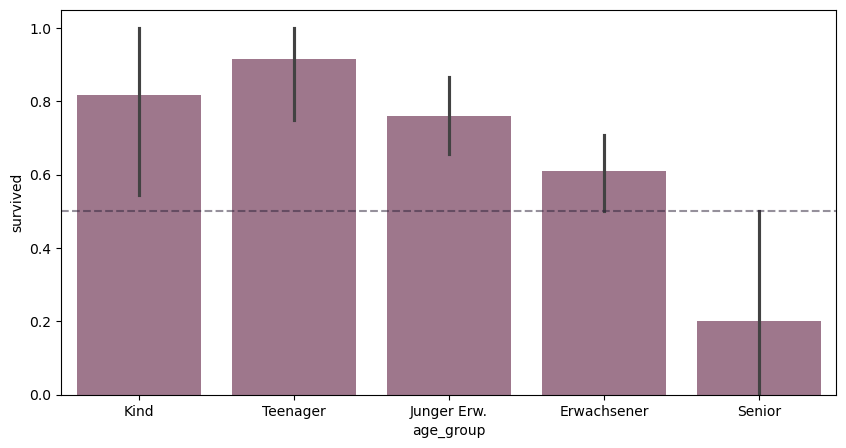

In [65]:
bins = [0, 12, 18, 35, 60, 100]
labels = ['Kind', 'Teenager', 'Junger Erw.', 'Erwachsener', 'Senior']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels)

plt.figure(figsize=(10, 5))

sns.barplot(data=titanic_data, x='age_group', y='survived', color='#A5708C')
plt.axhline(0.5, color='#2D2339', linestyle='--', alpha=0.5)

## Frage 2
Hatten Familien eine höhere Chance zu überleben - bzw. was war die "perfekte" Familiengröße

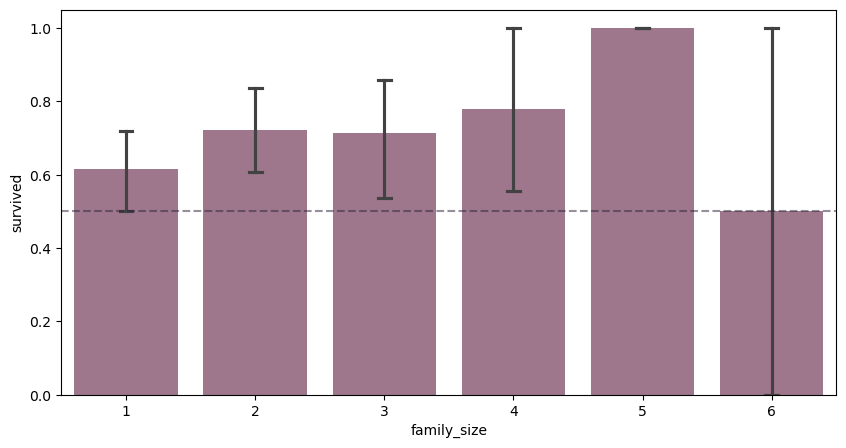

In [66]:
titanic_data['family_size'] = titanic_data['sibsp'] + titanic_data['parch'] + 1

plt.figure(figsize=(10, 5))
sns.barplot(data=titanic_data, x='family_size', y='survived', capsize=.1, color='#A5708C')
plt.axhline(0.5, color='#2D2339', linestyle='--', alpha=0.5)

## Frage 3
Wie waren die Preise über die Personen (Alter, Geschlecht, Klasse) aufgeteilt.

In [67]:
titanic_data.groupby('pclass')['fare'].agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
pclass,,,,
1,89.021975,71.2833,512.3292,0.00
2,18.444447,13.0000,39.0000,10.50
3,11.027500,10.4625,16.7000,7.65


<Axes: xlabel='age', ylabel='fare'>

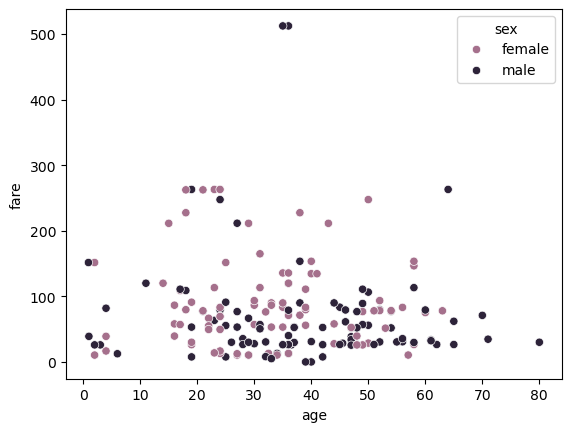

In [69]:
sns.scatterplot(data=titanic_data, x='age', y='fare', hue='sex', palette=["#A5708C", "#2D2339"])

<Axes: xlabel='fare', ylabel='Count'>

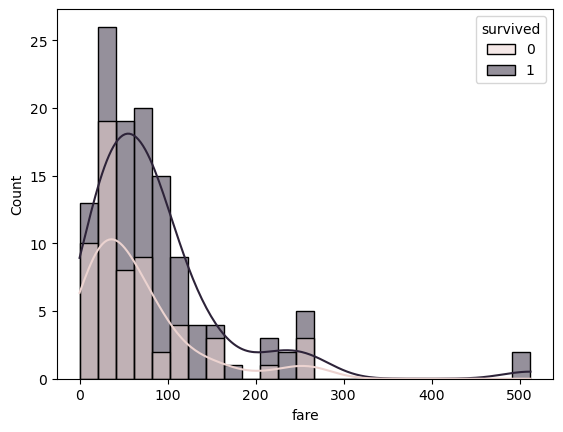

In [71]:
sns.histplot(data=titanic_data, x='fare', hue='survived', kde=True, common_norm=False, palette=["#ECD3D0", "#2D2339"])


<Axes: xlabel='fare', ylabel='sex'>

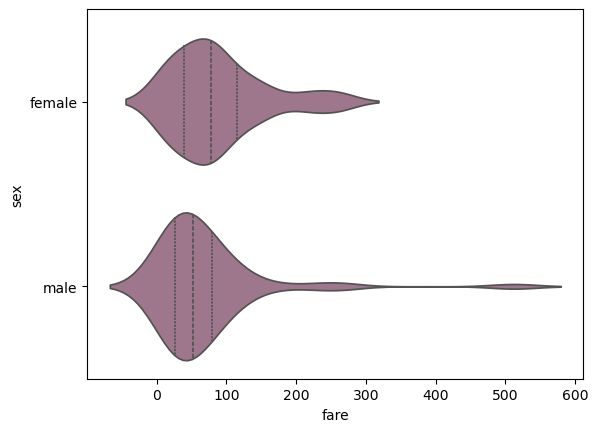

In [72]:
sns.violinplot(
    data=titanic_data,
    x='fare',
    y='sex',
    inner='quartile',
    color='#A5708C'
)